In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd
from brokenaxes import brokenaxes

In [2]:
dates = list()
names = ['Twitter', 'PowerApple', 'CrimeRussia', 'MenaFN', 'Novinite', 'RT', 'Daily Star', 'Daily Mail', 'Mirror']

dates_orig = ["09-24-2019 10:09", "09-26-2019 08:08","09-26-2019 09:50", "09-26-2019 18:20" , 
              "09-27-2019 13:49", "10-01-2019 13:37" ,"10-01-2019 18:21", "10-02-2019 04:54",
              "10-03-2019 02:01"]
for i in dates_orig:
    date_object = datetime.strptime(i, '%m-%d-%Y %H:%M')
    print(date_object)
    dates.append(date_object)
print(dates)

2019-09-24 10:09:00
2019-09-26 08:08:00
2019-09-26 09:50:00
2019-09-26 18:20:00
2019-09-27 13:49:00
2019-10-01 13:37:00
2019-10-01 18:21:00
2019-10-02 04:54:00
2019-10-03 02:01:00
[datetime.datetime(2019, 9, 24, 10, 9), datetime.datetime(2019, 9, 26, 8, 8), datetime.datetime(2019, 9, 26, 9, 50), datetime.datetime(2019, 9, 26, 18, 20), datetime.datetime(2019, 9, 27, 13, 49), datetime.datetime(2019, 10, 1, 13, 37), datetime.datetime(2019, 10, 1, 18, 21), datetime.datetime(2019, 10, 2, 4, 54), datetime.datetime(2019, 10, 3, 2, 1)]


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


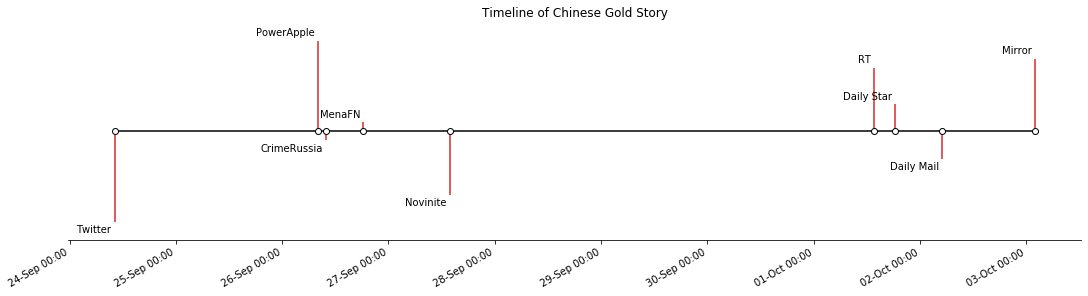

In [3]:
# Choose some nice levels
levels = np.tile([-10, 10, -1, 1, -7, 7, 3, -3, 8, -8],
                 int(np.ceil(len(dates)/6)))[:len(dates)]


# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set(title="Timeline of Chinese Gold Story")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.DayLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%d-%b %H:%M"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)

plt.show()

In [4]:
import matplotlib
matplotlib.axes.Axes.stem
matplotlib.axes.Axes.annotate
matplotlib.axis.Axis.set_major_locator
matplotlib.axis.Axis.set_major_formatter
matplotlib.dates.MonthLocator
matplotlib.dates.DateFormatter

matplotlib.dates.DateFormatter

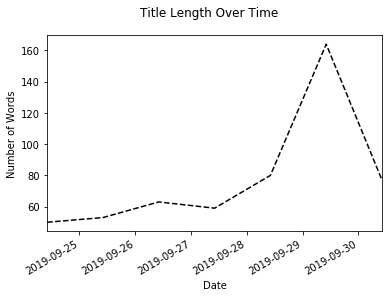

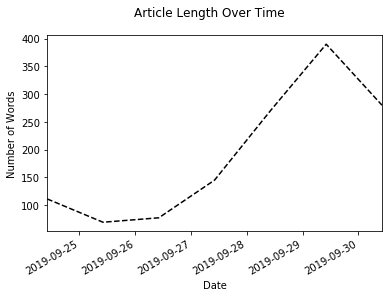

In [5]:

title_len = [50, 53, 63, 59, 80, 164, 77]
content_len = [111, 69, 77, 145, 270, 390, 280]

ts = pd.Series(title_len, index=pd.date_range(dates[0], periods=len(dates[2:]), freq="1D"))
fx = ts.plot(style='k--')#, label='Number of Words')
plt.suptitle("Title Length Over Time")
fx.set_xlabel("Date")
fx.set_ylabel("Number of Words")
plt.show()
ts = pd.Series(content_len, index=pd.date_range(dates[0], periods=len(dates[2:]), freq="1D"))
fx = ts.plot(style='k--')#, label='Number of Words')
plt.suptitle("Article Length Over Time")
fx.set_xlabel("Date")
fx.set_ylabel("Number of Words")
plt.show()
